# Project: Investigating TMDb movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Movie datasets can help us determine the best directors in the industry, understand cultural influence by language, predict movie earnings, create movie recommendation services and so on. Some of the questions we might ask after exploring this data set are as follows:

<ul>
<li>What are the 5 most popular movie genres??</li>
<li>What movie genre receives the highest average rating??</li>
<li>Do movies with higher budget receive a better rating??</li>
<li>What properties are associated with movies that have high revenues?</li>
<li>What are the top 10 most profitable movies???</li>
<li>Which directors have been consistent with producing top rated movies in the past decade??</li>
</ul>

<a id='wrangling'></a>
## Data Wrangling

Data wrangling refers to a variety of processes designed to transform raw data into more readily used formats. The exact methods differ from project to project depending on the data you’re leveraging and the goal you’re trying to achieve.
In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### Gathering the data

In [1]:
# import the necessary librarries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load your data 
df = pd.read_csv('tmdb-movies.csv')

<a id='assess'></a>
### Assessing the data

In [3]:
# display the first five rows of the dataframe
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# print information about the dataframe including the index dtype and columns, non-null values and memory usage
df.info()

# get the dimensionality of the dataframe (i.e no of rows x no of columns)
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

(10866, 21)

In [5]:
# get number of duplicate rows
sum(df.duplicated())

1

In [6]:
# get descriptive statistics of the dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Cleaning the data

After assessing the data, we realized that our dataset contains duplicates, missing values, incorrect datatypes and several columns that will be irrelevant to our analysis. In this section of the report, we will be using different techniques yo clran our data

In [7]:
# Drop columns that won’t be used in our analysis
df.drop(columns = ['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 
                   'release_date', 'budget_adj', 'revenue_adj'], inplace=True)

# rearrange the columns
df = df.reindex(columns=['original_title', 'director', 'genres', 'runtime', 'release_year', 'popularity', 
                         'vote_average', 'vote_count', 'budget', 'revenue'])

# print out a few lines of the updated dataframe
df.head()

,original_title,director,genres,runtime,release_year,popularity,vote_average,vote_count,budget,revenue
0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,124,2015,32.985763,6.5,5562,150000000,1513528810
1,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,120,2015,28.419936,7.1,6185,150000000,378436354
2,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,119,2015,13.112507,6.3,2480,110000000,295238201
3,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,136,2015,11.173104,7.5,5292,200000000,2068178225
4,Furious 7,James Wan,Action|Crime|Thriller,137,2015,9.335014,7.3,2947,190000000,1506249360


In [ ]:
# Drop the missing value at genres columns
df.dropna(subset=['genres'], how='any', inplace=True)

In [8]:
#remove duplicates
df.drop_duplicates(subset=['original_title'], keep='first', inplace=True)

# check number of duplicate rows
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis


### What are the top 10 most popular movie genres??

To get the top 5 most popular genres, we have to get the most popular movie genres from year to year and then count. But how do we classify a movie as popular or not? From the summary statistics, 75 percent of the movies in the dataset have a popularity of approximately 0.71 or less. Let's consider movies that are very popular as movies with popularity greater than or equal to 1.

Notice that each movie has more than one genre. Choosing one genre from each movie would bring bias to our analysis. Therefore we have to consider all the genres to find the most popular genres. 

In [9]:
# convert the elements in the 'genres' column from a string to a list
df.genres = df.genres.str.split('|')

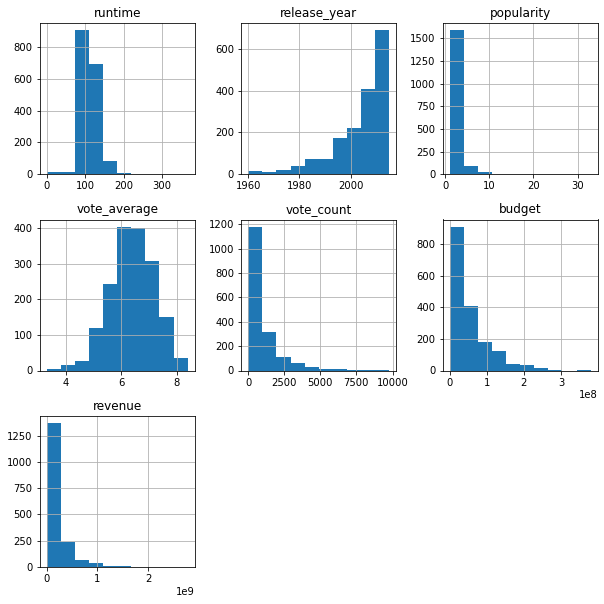

In [10]:
# get movies that have popularities greater than or equal to 1
df_very_popular = df.query('popularity >= 1')

# plot histogram of the different variable in the dataframe
df_very_popular.hist(figsize=(10, 10));

In [11]:
# use the explode() function to convert each list-like element of the 'genres' column into a row.
df_very_popular = df_very_popular.explode('genres')

# reset the index of the dataframe
df_very_popular.reset_index(drop=True, inplace=True)

In [12]:
# create a function to highlight the genres column
def highlight_col(x):
    return np.full((x.shape), 'background-color: yellow')

# display the first five rows of the exploded dataframe
df_very_popular.head(5).style.apply(highlight_col, axis=0, subset="genres")

,original_title,director,genres,runtime,release_year,popularity,vote_average,vote_count,budget,revenue
0,Jurassic World,Colin Trevorrow,Action,124,2015,32.985763,6.500000,5562,150000000,1513528810
1,Jurassic World,Colin Trevorrow,Adventure,124,2015,32.985763,6.500000,5562,150000000,1513528810
2,Jurassic World,Colin Trevorrow,Science Fiction,124,2015,32.985763,6.500000,5562,150000000,1513528810
3,Jurassic World,Colin Trevorrow,Thriller,124,2015,32.985763,6.500000,5562,150000000,1513528810
4,Mad Max: Fury Road,George Miller,Action,120,2015,28.419936,7.100000,6185,150000000,378436354


In [13]:
# Let's find the mean popularity of each movie genre according to their release year.
df_mean_popular = df_very_popular.groupby(['release_year', 'genres'],  as_index=False)['popularity'].mean()

In [14]:
# get the indices of the dataframe with the highest mean for each year.
idx = df_mean_popular.groupby(['release_year'])['popularity'].transform(max) == df_mean_popular['popularity']

# create a dataframe for most popular genres
df_most_popular = df_mean_popular[idx]

# display the first five rows of the dataframe 
df_most_popular.head(5) 

,release_year,genres,popularity
0,1960,Action,1.872132
1,1960,Adventure,1.872132
2,1960,Western,1.872132
3,1961,Adventure,2.631987
4,1961,Animation,2.631987


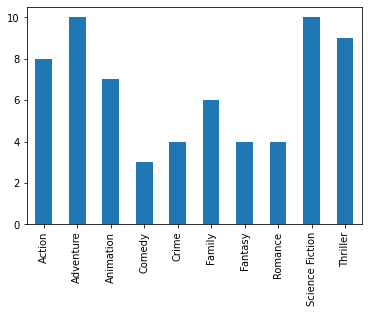

In [15]:
# rank top 10 most popular genres from highest to lowest count
df_most_popular['genres'].value_counts().nlargest(10).sort_index(ascending=True).plot(kind='bar');

### What is the genre that receives the highest average rating??

In [16]:
# use the explode() function to convert each list-like element of the 'genres' column into a row.
df_genres = df.explode('genres')

In [17]:
# find the highest mean rating according to genre
df_genres.groupby(['genres'])['vote_average'].mean().nlargest(1)

genres
Documentary    6.904678
Name: vote_average, dtype: float64

### Do movies with higher budget receive a better rating??

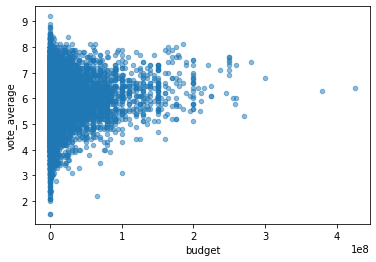

In [18]:
df.plot.scatter(x="budget", y="vote_average", alpha=0.5);

In [19]:
# find the correlation between the bugdet column and the vote_average column
df['budget'].corr(df['vote_average'])

0.08385428495191345

_From the scatterplot and with a correlation coefficient less than 0.1, we can suggest that movies with higher budget do not necessarily receive better ratings_

### What properties are associated with movies that have high revenues?

In [20]:
# calculate the net profit
profit = df['revenue'] - df['budget']

# create profit column in the dataframe
df['profit'] = profit

# find the correlation between the revenue and other variables
df[['popularity', 'vote_average', 'budget', 'revenue', 'profit']].corr()

,popularity,vote_average,budget,revenue,profit
popularity,1.000000,0.208749,0.544877,0.661999,0.627368
vote_average,0.208749,1.000000,0.083854,0.173435,0.183285
budget,0.544877,0.083854,1.000000,0.735011,0.569641
revenue,0.661999,0.173435,0.735011,1.000000,0.975982
profit,0.627368,0.183285,0.569641,0.975982,1.000000


_Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. Although, it should be noted that correlation does not imply causation. From the figure above, we can suggest that high revenue movies come with higher bugdget, higher profit, and higher popularity_

### What are the top 10 most profitable movies???

In [21]:
# calculate the Return On Investment (ROI)
df['ROI'] = df['profit'] / df['budget']

# sort the dataframe by net profit from highest to lowest 
df_profitable = df.sort_values(by=['profit'], ascending=False)

# display the first ten rows of the dataframe 
df_profitable.head(10)

,original_title,director,genres,runtime,release_year,popularity,vote_average,vote_count,budget,revenue,profit,ROI
1386,Avatar,James Cameron,"[Action, Adventure, Fantasy, Science Fiction]",162,2009,9.432768,7.1,8458,237000000,2781505847,2544505847,10.736312
3,Star Wars: The Force Awakens,J.J. Abrams,"[Action, Adventure, Science Fiction, Fantasy]",136,2015,11.173104,7.5,5292,200000000,2068178225,1868178225,9.340891
5231,Titanic,James Cameron,"[Drama, Romance, Thriller]",194,1997,4.355219,7.3,4654,200000000,1845034188,1645034188,8.225171
0,Jurassic World,Colin Trevorrow,"[Action, Adventure, Science Fiction, Thriller]",124,2015,32.985763,6.5,5562,150000000,1513528810,1363528810,9.090192
4,Furious 7,James Wan,"[Action, Crime, Thriller]",137,2015,9.335014,7.3,2947,190000000,1506249360,1316249360,6.927628
4361,The Avengers,Joss Whedon,"[Science Fiction, Action, Adventure]",143,2012,7.637767,7.3,8903,220000000,1519557910,1299557910,5.907081
3374,Harry Potter and the Deathly Hallows: Part 2,David Yates,"[Adventure, Family, Fantasy]",130,2011,5.711315,7.7,3750,125000000,1327817822,1202817822,9.622543
14,Avengers: Age of Ultron,Joss Whedon,"[Action, Adventure, Science Fiction]",141,2015,5.944927,7.4,4304,280000000,1405035767,1125035767,4.017985
8094,The Net,Irwin Winkler,"[Crime, Drama, Mystery, Thriller, Action]",114,1995,1.136610,5.6,201,22000000,1106279658,1084279658,49.285439
8,Minions,Kyle Balda|Pierre Coffin,"[Family, Animation, Adventure, Comedy]",91,2015,7.404165,6.5,2893,74000000,1156730962,1082730962,14.631499


### Which directors has been consistent with producing top rated movies in the past decade??

How do we classify a movie as "top rated"? From the summary statistics, 75 percent of the movies in the dataset have a popularity of approximately 6.6 or less. Let's consider movies as "top rated" if they have a rating of 7 and above.

In [22]:
df_top_rated = df.query('vote_average >= 7 & release_year >=  release_year.max() - 10')

In [23]:
df_top_rated.director.value_counts().nlargest(10)

Wes Anderson         7
Christopher Nolan    6
Joss Whedon          5
Martin Scorsese      5
Shannon Hartman      4
David Yates          4
Tom Hooper           4
Matthew Vaughn       4
Louis C.K.           4
Jay Oliva            4
Name: director, dtype: int64

### Limitations to our dataset

<ul>
<li>Lack of information on how the vote_average was calculated</li>
<li>The missing values in the data may affect our accuracy of analysis</li>
</ul>

<a id='conclusions'></a>
## Conclusions

From our analysis, we see that movies with higher revenues will most likely require higher budget. Production companies will require higher bugdget to produce high-quality movies that will generate higher profit. We can see the return on investments from some of the most profitable movies are 4 up to 49 times their budget. If we intend to produce a movie, it will be wise to hire directors like **Christopher Nolan** who have been consistent with creating top rated movies in the past deacade. 